## Introdução a Wavelet

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from ipywidgets import IntSlider
import math 

### Serie de Fourrier de x^2

In [28]:
def Fourier(dominio,n):    
    x = np.arange(-dominio*np.pi,dominio*np.pi,0.01)
    x2 = np.arange(-np.pi,np.pi,0.01)
    y = x2**2
    a1 = (np.pi**2)/3 
    for i in range(1,n,1):
        a1 = a1 + 4*(((-1)**i)/i**2)*np.cos(i*x)
    (a, b, c) =  plt.subplots(1,3)
    plt.figure(figsize = (10, 10))
    plt.title("Serie de Fourier de x²")
    plt.plot(x2,y,'k',label = "f(x) = x²")
    plt.plot(x,a1,"r--",label = "Series de Fourier")
    plt.legend()
    plt.grid(True)
    plt.show()

In [29]:
interactive(Fourier, dominio = IntSlider(min=1,max=3,value=1),
                    n = IntSlider(min = 2,max = 20,value = 2))  

interactive(children=(IntSlider(value=1, description='dominio', max=3, min=1), IntSlider(value=2, description=…

In [34]:
def Fourier(lim,n):    
    x = np.arange(-lim*np.pi,lim*np.pi,0.01)
    y = []
    x2 = np.arange(-np.pi,np.pi,0.01)
    for i in x2:
        y.append(math.fabs(i))
    
    y = y/x2
    a1 = 4/np.pi * (np.sin(x)/3)
    for i in range(2,n,1):
        a1 = a1 + 4/np.pi * (np.sin((2*i+1)*x)/3)
    plt.figure(figsize = (12, 12))
    plt.plot(x2,y,'k',label = "f(x) = |x|/x")
    plt.plot(x,a1,"r--",label = "Serie de Fourier")
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
interactive(Fourier, lim = IntSlider(min=1,max=3,value=1),
                    n = IntSlider(min = 2,max = 1000,value = 2))  

interactive(children=(IntSlider(value=1, description='lim', max=3, min=1), IntSlider(value=2, description='n',…

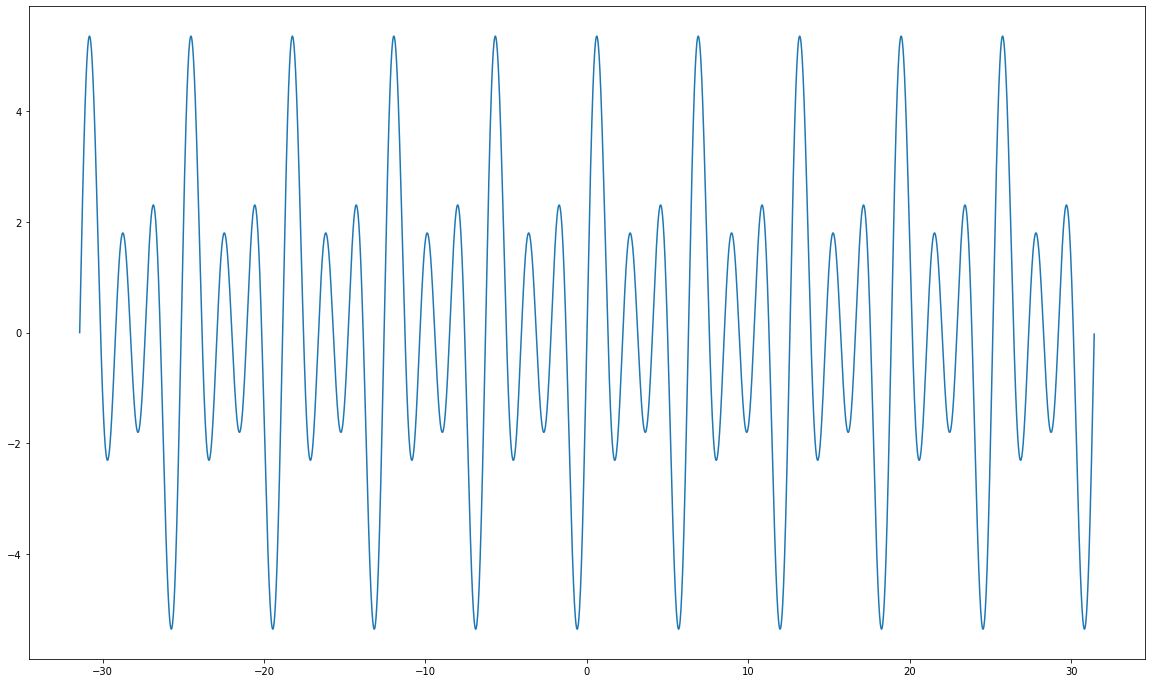

In [15]:
x = np.arange(-10*np.pi,10*np.pi,0.01)
y = np.sin(x)
y2 = 2*np.sin(2*x)
y3 = 3*np.sin(3*x)
plt.figure(figsize = (20, 12))
#plt.plot(x,y)
Y = np.sin(x) + 2*np.sin(2*x) +3*np.sin(3*x) 
#plt.plot(x,y2)
#plt.plot(x,y3)
plt.plot(x,Y)
plt.show()

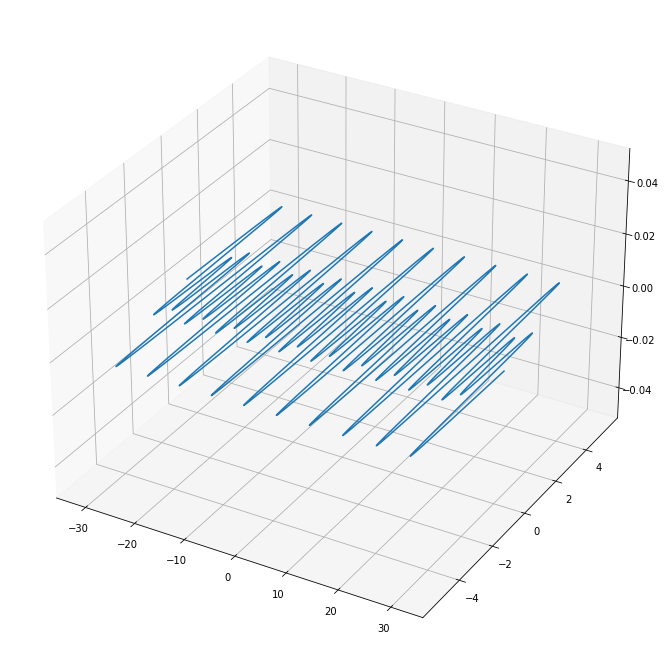

In [20]:
fig = plt.figure(figsize = (20, 12))
eixos = plt.axes(projection="3d")
x = np.arange(-10*np.pi,10*np.pi,0.01)
Y = np.sin(x) + 2*np.sin(2*x) +3*np.sin(3*x) 
#y = np.sin(x)
#y2 = 2*np.sin(2*x)
eixos.plot3D(x,Y) 
#eixos.plot3D(x,y2)   
plt.show()

C:\Users\helio\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


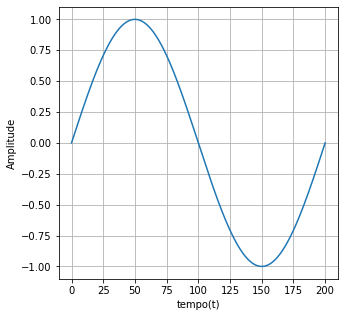

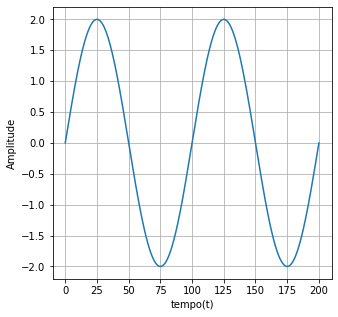

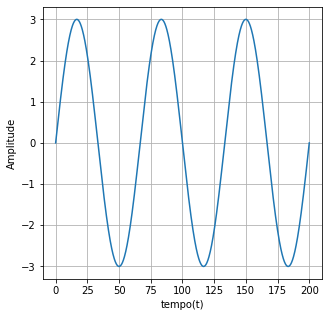

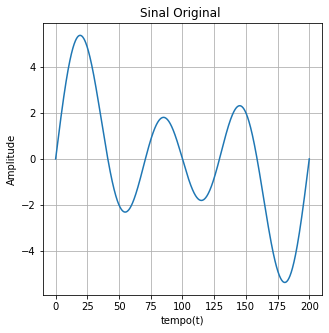

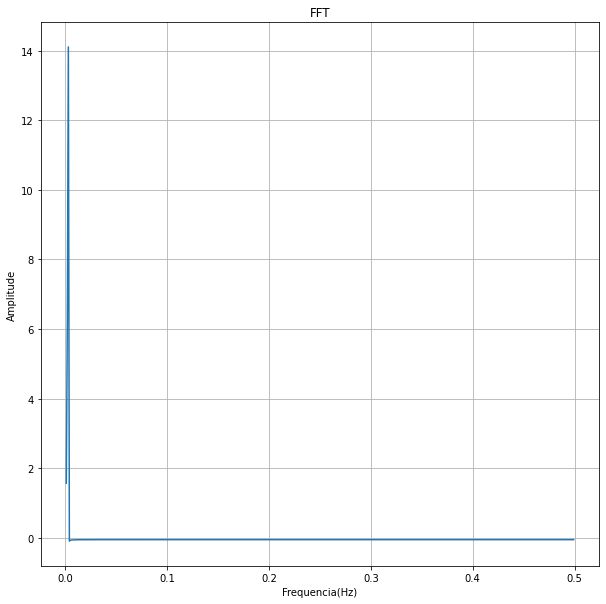

In [21]:
n = 1000
tx = 200
w = 2*np.pi / tx
t = np.linspace(0,tx,n)
y = np.sin(w*t)
y2 = 2*np.sin(2*w*t)
y3 = 3*np.sin(3*w*t)
Y = y + y2 + y3
freq = np.fft.fftfreq(n)
mascara = freq>0
fft_calculo = np.fft.fft(Y)
plt.figure(1,figsize = (5, 5))
plt.grid(True)
plt.plot(t,y)
plt.xlabel("tempo(t)")
plt.ylabel('Amplitude')
plt.figure(2,figsize = (5, 5))
plt.plot(t,y2)
plt.xlabel("tempo(t)")
plt.ylabel('Amplitude')
plt.grid(True)
plt.figure(3,figsize = (5, 5))
plt.plot(t,y3)
plt.xlabel("tempo(t)")
plt.ylabel('Amplitude')
plt.grid(True)
plt.figure(4,figsize = (5, 5))
plt.grid(True)
plt.xlabel("tempo(t)")
plt.ylabel('Amplitude')
plt.title("Sinal Original ")
plt.plot(t,Y)
plt.xlabel("tempo(t)")
plt.ylabel('Amplitude')
plt.figure(5,figsize = (10, 10))
plt.grid(True)
plt.title("FFT")
plt.plot(freq[mascara],fft_calculo[mascara])
plt.xlabel("Frequencia(Hz)")
plt.ylabel('Amplitude')
plt.show()




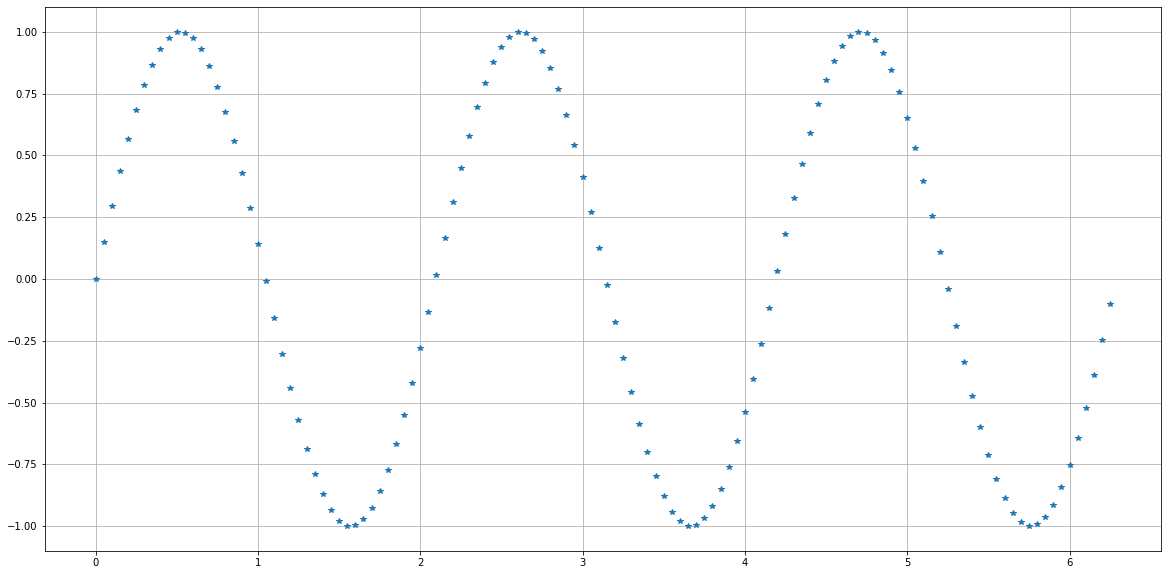

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.05)
y = np.sin(3*x)
plt.figure(figsize=(20,10))
plt.plot(x,y,"*")
plt.grid(True)
plt.show()

# DFT(Transformada Discreta de Fourier)

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from ipywidgets import IntSlider
import math 


def real(n,m,N):
    return np.cos(2*np.pi*n*(m/N))
def imaginaria(n,m,N):
    return -1*np.sin(2*np.pi*n*(m/N))

def DFT(amostragem,m,x):

    if len(m) == len(x):
        coeficiente = []

    
        for i in range(amostragem):
            ponto_real = 0
            ponto_imaginario = 0
            for j in range(len(m)):
                re =  x[j]*real(i,j,amostragem)
                ponto_real = ponto_real + re
                imagi = x[j]*imaginaria(i,j,amostragem) 
                ponto_imaginario = ponto_imaginario + imagi


            coeficiente.append([ponto_real,ponto_imaginario])
        magnitude = []
        fase = []
        for i in range(amostragem):
            mag = np.sqrt(coeficiente[i][0]**2 + coeficiente[i][1]**2)
            magnitude.append(mag)
            if coeficiente[i][0] ==0:
                fase.append((np.pi/2))
            else:
                 fs = math.atan(coeficiente[i][1]/coeficiente[i][0])
                 fase.append(fs)
        plt.plot(m,fase,"*")
    else:
        print("As matrizes precisam ter o mesmo tamanho!")


In [70]:
x = [1,2,3]
y = [1,2,1]

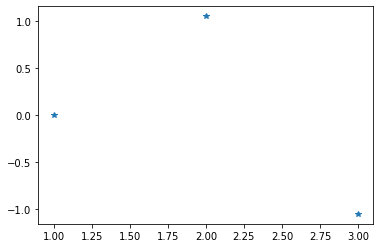

In [71]:
DFT(amostragem=3,m=x,x=y)

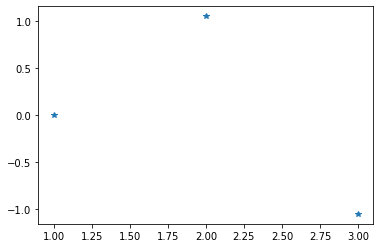

In [65]:
plt.plot(x,y,"*")

In [93]:
x = np.arange(0,7,1)
y = np.sin(2*np.pi*1000*x) + 0.5*np.sin(2*np.pi*2000*x + (3*np.pi)/4)

In [94]:
print(y)

[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339]
